# Creative Programming Assignment 01

Author: Kelly Zhang

### Monthly Provisional Counts of Death

This dataset is published by the Centers for Disease Control and Prevention on data.gov. It details the count of deaths for each month, ranging from 2019 to 2021. Death counts are further broken down per age group, sex, and race/ethnicity for select underlying causes.

You can access the dataset here: 
https://catalog.data.gov/dataset/monthly-provisional-counts-of-deaths-by-age-group-sex-and-race-ethnicity-for-select-causes

I will answer the following questions:
1. 
2. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the data into a pandas dataframe

In [3]:
df = pd.read_csv('AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv')
df

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,0,5,2,3,0,2,8,2,0,0
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,0,11,6,4,4,5,25,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,45-54 years,179,...,1,1,0,0,2,34,18,2,70,68
3956,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,55-64 years,237,...,0,3,8,3,2,36,40,8,55,55
3957,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,65-74 years,263,...,3,4,8,3,4,25,60,7,55,49
3958,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,75-84 years,203,...,5,2,6,4,4,17,37,8,36,34


Clean up data

In [19]:
mod_df = df.dropna()
print("Modified DF (rows with NaN values dropped):")
print(mod_df)

Modified DF (rows with NaN values dropped):
                                    Occupation  All_workers All_weekly  \
0                              ALL OCCUPATIONS       109080        809   
1                                   MANAGEMENT        12480       1351   
2                             Chief executives         1046       2041   
3              General and operations managers          823       1260   
4                                  Legislators            8         Na   
..                                         ...          ...        ...   
553                  Pumping station operators           18         Na   
554  Refuse and recyclable material collectors           72        501   
555                 Mine shuttle car operators            0         Na   
556          Tank car, truck, and ship loaders            6         Na   
557         Material moving workers, all other           37         Na   

     M_workers M_weekly  F_workers F_weekly  
0        60746      8

### 2. Rough Overview of data:

**All_workers**: Number of male and female workers (in thousands)

**All_weekly**: Median weekly income of male and female workers (in USD)

**M_workers**: Number of male workers (in thousands)

**M_weekly**: Median weekly income of male workers (in USD)

**F_workers**: Number of female workers (in thousands)

**F_weekly**: Median weekly income of female workers (in USD)

In [3]:
df.describe()

,All_workers,M_workers,F_workers
count,558.000000,558.000000,558.000000
mean,586.458781,326.593190,259.831541
std,4758.979138,2654.600532,2142.551053
min,0.000000,0.000000,0.000000
25%,21.000000,11.000000,3.000000
50%,67.000000,33.500000,18.000000
75%,253.000000,121.750000,84.000000
max,109080.000000,60746.000000,48334.000000


### 3. Analyze Data

a. Print array of columns and index array

In [4]:
df.columns

Index(['Occupation', 'All_workers', 'All_weekly', 'M_workers', 'M_weekly',
       'F_workers', 'F_weekly'],
      dtype='object')

In [16]:
# all occupations in this dataset
occupations = df['Occupation'].unique()
occupations

array(['ALL OCCUPATIONS', 'MANAGEMENT', 'Chief executives',
       'General and operations managers', 'Legislators',
       'Advertising and promotions managers',
       'Marketing and sales managers',
       'Public relations and fundraising managers',
       'Administrative services managers',
       'Computer and information systems managers', 'Financial managers',
       'Compensation and benefits managers', 'Human resources managers',
       'Training and development managers',
       'Industrial production managers', 'Purchasing managers',
       'Transportation, storage, and distribution managers',
       'Farmers, ranchers, and other agricultural managers',
       'Construction managers', 'Education administrators',
       'Architectural and engineering managers', 'Food service managers',
       'Funeral service managers', 'Gaming managers', 'Lodging managers',
       'Medical and health services managers',
       'Natural sciences managers',
       'Postmasters and mail superi

### Q1. Percentage women in the top 20 earning positions

Find the top 20 paying positions

In [7]:
df.All_weekly = pd.to_numeric(df.All_weekly, errors='coerce')
top_income_roles = df.dropna()
top_income_roles = top_income_roles.sort_values(by=['All_weekly'], ascending=False)
top_income_roles = top_income_roles.head(20)
top_income_roles

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
2,Chief executives,1046,2041.0,763,2251,283,1836
136,"Judges, magistrates, and other judicial workers",54,1952.0,33,Na,20,Na
176,Pharmacists,206,1920.0,98,2117,108,1811
20,Architectural and engineering managers,110,1899.0,101,1892,10,Na
134,Lawyers,803,1886.0,503,1914,300,1717
86,Computer hardware engineers,72,1876.0,62,1871,10,Na
177,Physicians and surgeons,740,1824.0,457,1915,283,1533
87,Electrical and electronics engineers,283,1778.0,246,1819,37,Na
523,Aircraft pilots and flight engineers,114,1735.0,104,1830,9,Na
9,Computer and information systems managers,636,1728.0,466,1817,169,1563


Simple plot showing the total number of workers with corresponding income for the top 20 paying jobs

<AxesSubplot:xlabel='All_weekly'>

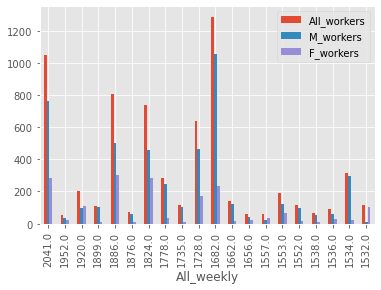

In [64]:
top_income_roles.plot(x = 'All_weekly', y=['All_workers', 'M_workers','F_workers'], kind='bar')

Pivot Table: Male and Female Income Breakdown in the Top 20 Earning Positions

In [ ]:
top_income_roles.pivot(index="All_weekly", columns="F_weekly")

In [33]:
top_income_roles_list = top_income_roles.groupby('All_weekly')


Plot the amount of women and men in the top 20 paying positions

In [45]:
plt.figure(figsize=(25,15))
plt.style.use('ggplot')
top_income_roles.T.plot(kind='bar')

plt.legend(['Women', 'Men'])
plt.title("Number of Women and Men in Top 20 Paying Positions", fontsize=30)
plt.ylabel("Number of Workers (Thousands)", fontsize=24)
plt.savefig('gender_breakdown_top_paying_positions.png')

TypeError: no numeric data to plot

<Figure size 1800x1080 with 0 Axes>

Groupby

### Q2. Percentage of income in the top 20 earning positions earned by women 

Plot the 

Create a pivot table

Plot some data from the above pivot table

Groupby

### Discussion

I imported the Kaggle dataset, Gender Wage Gap, to look at the percentage of women in the top 20 paying positions, and what percentage of income from the top 20 paying positions is earned by women.

I found that